In [4]:
import dash
from dash import Dash, html, dcc
from dash.dependencies import Output, Input
import pandas as pd
import numpy as np
import os
from wordcloud import WordCloud, ImageColorGenerator
import base64
from io import BytesIO
from PIL import Image
import requests
import matplotlib.pyplot as plt


In [2]:
path = os.path.dirname(os.getcwd())
df_album = pd.read_csv(os.path.join(path, 'data/album_with_images.csv'))


In [13]:
value = 'LE SSERAFIM'


In [29]:
df = df_album[df_album['artist_name'] == value].dropna(subset=['song_lyrics'])
for idx, (album_title, year, lyric, album_image) in enumerate(zip(df['album_title'], df['year'], df['song_lyrics'], df['album_image']), start=1):
    print(album_title, lyric)


fearless 나도 모르게 달콤해 침이 고여 이건 사랑 맞아 한참 노려봐 손에 뚝 떨어지길 기다리고 있어 갖고 싶어 손쉽게 낭만적인 fairy tale 사다리를 오를 때 발아래 아찔해 허나 길게 팔을 뻗어도 닿지 않아 뒤꿈치를 들어도 도무지가 손에 쥘 없는 love 이러다가 나만 다치겠어 hurt 푸릇 쌉싸름해 taste 뭐 그리 달콤하진 않을 것 같애 설익은 감정들이 feel afraid never bite never bite pain sour 눈물 나게 시큼한 맛 sour 그런 만약 사랑이면 맛보고 싶지 않아 feel afraid love sour love sour grapes 눈이 스치면 가끔씩은 맘 끝이 떨리기도 했어 처음 느껴보는 heart 입 정도 깨문다면 어떨까도 했어 붉어지는 열매에 시선을 뺏긴 채 가지 끝에 달린 grapes 달달할까 상상해 허나 걸음씩 거릴 좁혀도 손을 잡을 수는 없는걸 사다리 저 너머 위에 놓인 love 나만 괜히 상처받긴 싫어 hurt 푸릇 쌉싸름해 taste 뭐 그리 달콤하진 않을 것 같애 설익은 감정들이 feel afraid never bite never bite pain sour 눈물 나게 시큼한 맛 sour 그런 만약 사랑이면 맛보고 싶지 않아 feel afraid love sour love sour grapes 착각은 마 딱히 좋아한 적 없으니까 조금도 아쉽지가 않다니까 속여 day night 아직 어설프게 익지 않은 grapes 아마도 내겐 때가 아닌 것 같애 푸릇하게 아직 설익은 scent feeling scared feeling scared sour 눈물 나게 시큼한 맛 sour 그런 만약 사랑이면 맛보고 싶지 않아 feel afraid love sour love sour grapeswish never cost 그게 뭐라고 해도 하날 위해선 하날 포기하라고 아름다운 목소리 일곱 빛 꼬리까지 전부 전부 나라서 sacrifice living life 원하는 가질 그래도 물거품으로 만들진 못해 give give 

fearless 2022 200 200
fearless 2022 (200, 200, 3)
antifragile 2022 200 200
antifragile 2022 (200, 200, 3)
choices 2023 200 200
choices 2023 (200, 200, 3)
unforgiven 2023 200 200
unforgiven 2023 (200, 200, 3)
이브, 프시케 그리고 푸른 수염의 아내 (feat. upsahl) 2023 200 200
이브, 프시케 그리고 푸른 수염의 아내 (feat. upsahl) 2023 (200, 200, 3)
jewelry (prod. imase) 2023 197 200
jewelry (prod. imase) 2023 (197, 200, 3)
이브, 프시케 그리고 푸른 수염의 아내 (feat. demi lovato) 2023 200 200
이브, 프시케 그리고 푸른 수염의 아내 (feat. demi lovato) 2023 (200, 200, 3)


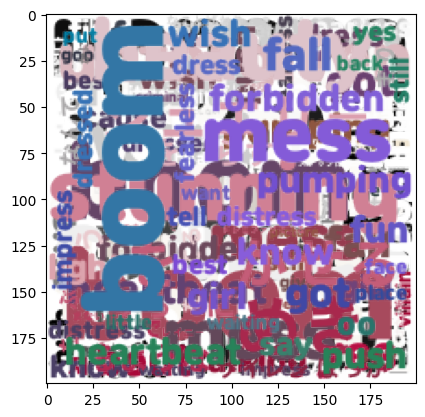

In [28]:
df = df_album[df_album['artist_name'] == value].dropna(subset=['song_lyrics'])
images = []

for idx, (album_title, year, lyric, album_image) in enumerate(zip(df['album_title'], df['year'], df['song_lyrics'], df['album_image']), start=1):
    #colormaps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']
    #colormap=random.choice(colormaps),

    response = requests.get(album_image)
    image_data = BytesIO(response.content)
    image_opened = Image.open(image_data)
    coloring = np.array(image_opened.convert('RGB'))
    image_colors = ImageColorGenerator(np.array(image_opened), default_color=(255,255,255))


    print(album_title, year, coloring.shape[0], coloring.shape[1])

    word_cloud = WordCloud(
        width=coloring.shape[0],
        height=coloring.shape[1],
        max_words=30,
        collocations=False,
        background_color="rgba(255, 255, 255, 0)",
        mode="RGBA",
        font_path='../data/font/JalnanOTF.otf'
    ).generate(lyric)

    print(album_title, year, coloring.shape)

    image = word_cloud.recolor(color_func=image_colors).to_image()

    plt.imshow(image)


In [4]:
len(img)


240

In [13]:

# from plotly.subplots import make_subplots
# import plotly.graph_objects as go
# from skimage import io
# img = io.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Crab_Nebula.jpg/240px-Crab_Nebula.jpg')
# fig = make_subplots(
#     rows=10, cols=1)

# for i in range(1, 11):
#     fig.add_trace(go.Image(z=img), i, 1)
# fig


In [ ]:
import plotly.express as px
from keras.datasets import mnist


fig = px.imshow(X_train[:10, :, :], binary_string=True, facet_col=0, facet_col_wrap=5)

fig = px.imshow(X_train[:10, :, :], binary_string=True, animation_frame=0)


In [1]:




# Initialize the Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
app.title = "Image Gallery"

# Get list of image files in the 'images' directory
image_directory = 'images/'
list_of_images = [img for img in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, img))]
image_options = [{"label": img, "value": img} for img in list_of_images]

# Encode images in base64 and store in dictionary
encoded_images = {}
for image_name in list_of_images:
    image_path = os.path.join(image_directory, image_name)
    with open(image_path, "rb") as image_file:
        encoded_images[image_name] = base64.b64encode(image_file.read()).decode('ascii')

# Define the layout of the app
app.layout = dbc.Container([
    dbc.Row(dbc.Col(html.H1("Image Gallery"))),
    dbc.Row(dbc.Col(dcc.Dropdown(
        id='image-dropdown',
        options=image_options,
        value=list_of_images,  # default value is all images
        multi=True
    ))),
    dbc.Row(dbc.Col(id='image-gallery'))
])

@app.callback(
    Output('image-gallery', 'children'),
    [Input('image-dropdown', 'value')]
)
def update_gallery(selected_images):
    if not selected_images:
        return "Please select an image."
    return [html.Img(src='data:image/png;base64,{}'.format(encoded_images[img]), style={'width': '100%', 'padding': '10px'}) for img in selected_images]


FileNotFoundError: [Errno 2] No such file or directory: 'images/'

In [32]:
df_total = pd.read_csv('../data/major_girlgroups_final.csv')


In [27]:
df = pd.read_csv('../data/artist_by_year.csv')


In [34]:
df[df['artist_name']=="Girls' Generation"]


,artist_id,year,artist_name,song_lyrics
71,80026432,2007,Girls' Generation,소원을 말해요 들어줄게 매일밤 혼자 기도만 하지말고 날사랑하는맘 알고있는걸 날사귀고...
72,80026432,2008,Girls' Generation,오 흔들어봐 맘 돌려봐 다른 사랑에 끌리고 있어 아직도 모르겠니 벌써 맘 기울고 있...
73,80026432,2009,Girls' Generation,제시카 알아 뒤에서 훔쳐보는 눈빛 살금 살금 몰래 몰래 발소리 태연 새 빨간 숫자 ...
74,80026432,2010,Girls' Generation,hey boys worries put smile hey girls pain gain...
75,80026432,2011,Girls' Generation,one two three four 짜릿하게 어머나 one two three four...
76,80026432,2013,Girls' Generation,툭하면 기분을 뒤바꿔 놓는 조종하지 즐겁겠지 왜 자꾸만 맘을 흔들어놓는지 움직이지 ...
77,80026432,2014,Girls' Generation,가만히 뒤에서 끌어안아줘 어깨에 턱을 기대 너무 세지 않게 살짝 온기가 전해지게 감...
78,80026432,2015,Girls' Generation,서툰 말보단 행동만이 나는 믿겨져 지식보다도 의식들만이 움직여 첫 눈에 반한 듯이 ...
79,80026432,2016,Girls' Generation,지나간 계절 사이로 새겨진 추억 중에도 오늘 처음 본 그날 떠올라 햇살 좋은 여름날...
80,80026432,2017,Girls' Generation,thinking ‘ bout 어디쯤 있었니 정말 달라진 없어 멀어진 뒤로 참 힘들었...


In [38]:
# df_total[(df_total['artist_id']==80026432) & (df_total['year']==2022)]


,artist_id,artist_name,album_id,album_title,song_id,song_title,release_date,song_artist,song_lyrics
year,,,,,,,,,
2007,3441136576,SMTOWNSMTOWNSMTOWNSMTOWNSMTOWNSMTOWNSMTOWNSMTO...,345358434,07 Winter SMTown - Only Love07 Winter SMTown -...,8039113080391131803911328039113380391134803911...,사랑 하나죠 (Only Love)12월 27일 (On December 27th)Ev...,2007-12-072007-12-072007-12-072007-12-072007-1...,SMTOWN보아 (BoA)동방신기 (TVXQ!)SUPER JUNIOR (슈퍼주니어)...,[This song is dedicated to our neighbors\r\n\r...
2008,4961638784,Various ArtistsVarious ArtistsVarious ArtistsV...,8581910,베토벤 바이러스 (MBC 수목드라마)베토벤 바이러스 (MBC 수목드라마)베토벤 바이...,1599321159932215993231599324159932515993261599...,운명무대위로내사람천방지축 두루미베토벤을 생각하며도전들리나요...기다림Maestro한...,2008-09-172008-09-172008-09-172008-09-172008-0...,이필호이필호환희이필호이필호이필호태연 (TAEYEON)이필호이필호이진성이필호이필호소녀...,[][][난 웃어도 눈물이 나\r\n내 사랑이 혹시 그대 맘에 해가 될까\r\n난 ...
2009,2080687232,SUPER JUNIOR (슈퍼주니어)소녀시대 (GIRLS' GENERATION)Va...,5016806,SeoulChocolate Love - 소녀시대맨땅에 헤딩 (MBC 수목 미니시리즈...,1854767181622118133391808971180897218133401813...,SeoulChocolate Love (Retro Pop ver.)뛰어!사랑인걸요하늘...,2009-12-152009-10-082009-09-302009-09-302009-0...,SUPER JUNIOR (슈퍼주니어)소녀시대 (GIRLS' GENERATION)마이...,[어느새 하루가 또 지나고\r\n집으로 향한 나의 발걸음\r\n부푼 가슴에 첨 시작...
2010,6802246720,소녀시대 (GIRLS' GENERATION)소녀시대 (GIRLS' GENERATIO...,20186750,'Into The New World' - The 1st Asia Tour Conce...,2204302220430322043042204305220430622043072204...,Nine Angels소원을 말해봐 (Genie) (Rock Tronic Remix ...,2010-12-302010-12-302010-12-302010-12-302010-1...,소녀시대 (GIRLS' GENERATION)소녀시대 (GIRLS' GENERATIO...,[We're waiting for nine angels\r\nsunshine pea...
2011,2960977984,소녀시대 (GIRLS' GENERATION)소녀시대 (GIRLS' GENERATIO...,11160324,'The Boys' Maxi Single'The Boys' Maxi Single'T...,2536360253636125363622536363253636425363652536...,The Boys (English Ver.)The Boys (Clinton Spark...,2011-12-212011-12-212011-12-212011-12-212011-1...,소녀시대 (GIRLS' GENERATION)소녀시대 (GIRLS' GENERATIO...,[I can tell you're lookin at me \r\nI know wha...
2012,2640872256,소녀시대 (GIRLS' GENERATION)소녀시대 (GIRLS' GENERATIO...,11497460,Girls' Generation II ~ Girls & Peace ~ (일본발매앨범...,2993468299346929934702993471299347229934732993...,Flower PowerAnimalI'm a DiamondReflectionStay ...,2012-11-282012-11-282012-11-282012-11-282012-1...,소녀시대 (GIRLS' GENERATION)소녀시대 (GIRLS' GENERATIO...,[히카리토 야미노 마요나카 \r\nweekend\r\nDancing floor sc...
2013,4801585920,소녀시대 (GIRLS' GENERATION)소녀시대 (GIRLS' GENERATIO...,22287348,Love & Peace (일본발매앨범)Love & Peace (일본발매앨범)Love...,3310891331089233108933310894331089533108963310...,Gossip GirlsMotorcycleFlyersGalaxy SupernovaLo...,2013-12-112013-12-112013-12-112013-12-112013-1...,소녀시대 (GIRLS' GENERATION)소녀시대 (GIRLS' GENERATIO...,"[Gossip, gossip, gossip, gossip\r\n\r\nリリカルにピア..."
2014,2960977984,소녀시대 (GIRLS' GENERATION)소녀시대 (GIRLS' GENERATIO...,15975519,The Best (일본발매앨범)The Best (일본발매앨범)The Best (일본...,3643822364382336438243643825364382636438273643...,Genie (Japanese ver.)Gee (Japanese ver.)Run De...,2014-08-252014-08-252014-08-252014-08-252014-0...,소녀시대 (GIRLS' GENERATION)소녀시대 (GIRLS' GENERATIO...,"[Turn it up~! Just turn it up~! That's right, ..."
2015,2080687232,Various ArtistsVarious ArtistsVarious ArtistsV...,13622510,SBS MTV 매시업 K-Pop Remix 제1탄SBS MTV 매시업 K-Pop R...,4625883462588446258854625886462588746258884625...,"GEE (DJ Beejay, Neck Towel Remix)스모키걸 (DJ Soo ...",2015-11-172015-11-172015-11-172015-11-172015-1...,소녀시대 (GIRLS' GENERATION)엠블랙(MBLAQ)언터쳐블에이오에이(AO...,[너무너무 멋져 눈이 눈이 부셔 \n숨을 못 쉬겠어 떨리는 Girl \nGee Ge...


In [31]:
ls ../data


albums/                       girlgroup_list.csv
artist_by_year.csv            lyrics/
artist_by_year_and_album.csv  major_girlgroups_final.csv
final/                        tracks/
font/


In [39]:
import os
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import base64
import dash_bootstrap_components as dbc

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
from wordcloud import WordCloud
# from dash_holoniq_wordcloud import DashWordcloud

path = os.path.dirname(os.getcwd())
df_year = pd.read_csv(os.path.join(path, 'data/artist_by_year.csv'))

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1(children='What Happened to K-pop Girl Groups?', style={'textAlign': 'center'}),
    dcc.Dropdown(
        options=[{'label': artist, 'value': artist} for artist in df_year.artist_name.unique()],
        value="Girls' Generation",
        id='dropdown-selection'
    ),
    html.Img(id='word-cloud')
])

@app.callback(
    Output('word-cloud', 'figure'),
    Input('dropdown-selection', 'value')
)
def make_image(value):
    df = df_year[df_year['artist_name'] == value]
    num_lyrics = len(df)

    fig = make_subplots(rows=num_lyrics, cols=1, vertical_spacing=0.1, subplot_titles=df['year'].tolist())

    for idx, lyric in enumerate(df.song_lyrics):
        # Get number of unique words
        num_unique_words = len(set(lyric.split()))

        # Dynamically adjust width and height based on unique word count
        dynamic_width = max(800, min(1500, num_unique_words * 15))
        dynamic_height = max(400, min(750, num_unique_words * 8))

        word_cloud = WordCloud(font_path='../data/font/JalnanOTF.otf', width=dynamic_width, height=dynamic_height,
                               colormap='dd', max_words=50, collocations=False).generate(lyric)

        wc_fig = px.imshow(word_cloud.to_array(), color_continuous_scale='RdPu')

        for trace in wc_fig.data:
            fig.add_trace(trace, row=idx+1, col=1)

    fig.update_layout(
        title=f"Word Clouds for {value}",
        height=600*num_lyrics,
        margin=dict(t=50, b=50, l=50, r=50)
    )

    fig.update_annotations(font_size=10)

    return fig


In [43]:
make_image(value)


ValueError: 'dd' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

In [40]:
value = '(G)I-DLE'


In [41]:
path = os.path.dirname(os.getcwd())
df_year = pd.read_csv(os.path.join(path, 'data/artist_by_year.csv'))


In [42]:
# set(df_year.artist_name.tolist())


In [24]:
df = df_year[df_year['artist_name'] == value]
num_lyrics = len(df)

fig = make_subplots(rows=num_lyrics, cols=1, vertical_spacing=0.1, subplot_titles=df['year'].tolist())

for idx, lyric in enumerate(df.song_lyrics):
    print(idx)


0
1
2
3
4
5
